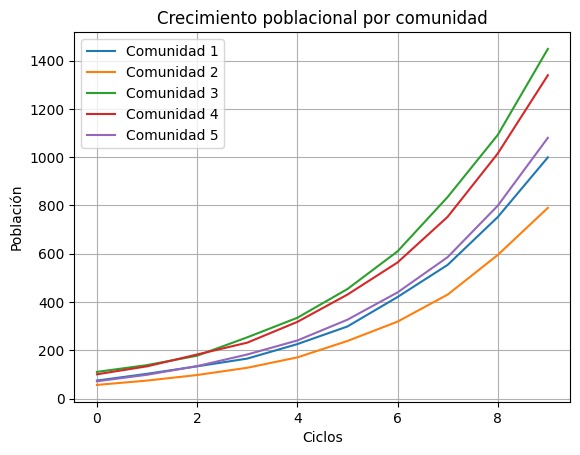

In [10]:
import random
import matplotlib.pyplot as plt

class Individuo:
    def __init__(self):
        self.edad = random.randint(0, 100)
        self.salud = random.choice(["sano", "enfermo"])
        self.tasa_reproduccion = random.uniform(0.1, 0.9)
        self.vivo = True

    def envejecer(self):
        self.edad += 1
        if self.edad > 80 or (self.salud == "enfermo" and self.edad > 40):
            self.vivo = False

    def reproducir(self):
        if self.tasa_reproduccion > random.uniform(0, 1):
            return Individuo()
        return None

class Comunidad:
    def __init__(self, num_inicial):
        self.individuos = [Individuo() for _ in range(num_inicial)]
        self.recursos = random.randint(1000, 5000)

    def ciclo(self):
        nuevos_individuos = []
        for ind in self.individuos:
            ind.envejecer()
            hijo = ind.reproducir()
            if hijo:
                nuevos_individuos.append(hijo)
        self.individuos.extend(nuevos_individuos)
        self.individuos = [ind for ind in self.individuos if ind.vivo]
    
    def num_individuos(self):
        return len(self.individuos)

class Mundo:
    def __init__(self, num_comunidades):
        self.comunidades = [Comunidad(random.randint(50, 100)) for _ in range(num_comunidades)]
        self.historial_poblacion = []

    def ciclo(self):
        poblaciones = []
        for comunidad in self.comunidades:
            comunidad.ciclo()
            poblaciones.append(comunidad.num_individuos())
        self.historial_poblacion.append(poblaciones)

    def graficar(self):
        for i, comunidad in enumerate(self.comunidades):
            plt.plot([poblacion[i] for poblacion in self.historial_poblacion], label=f"Comunidad {i+1}")
        
        plt.title("Crecimiento poblacional por comunidad")
        plt.xlabel("Ciclos")
        plt.ylabel("Población")
        plt.legend()
        plt.grid(True)
        plt.show()

# Ejemplo de uso:
mundo = Mundo(5)
for i in range(10):  # Simular 10 ciclos
    mundo.ciclo()

mundo.graficar()


### a. Modelado multiescala:
El modelado multiescala es una técnica que se utiliza para simular, analizar y entender sistemas que presentan comportamiento relevante en múltiples escalas de tiempo o espacio. En el contexto del crecimiento de la población, como el que hemos simulado, el modelado multiescala es esencial porque los sistemas complejos, como las poblaciones, no pueden ser completamente comprendidos si se examinan solo a una escala. Por ejemplo, las decisiones y eventos que ocurren a nivel individual (como la reproducción o la muerte) afectan la dinámica de la población a nivel de comunidad y global.

### b. Modelo a nivel individual:
En esta simulación, el modelo a nivel individual se centra en el Individuo. A esta escala, se consideran factores como:

**Edad:** cada individuo tiene una edad asignada aleatoriamente entre 0 y 100 años.  
**Salud:** un individuo puede estar "sano" o "enfermo".  
**Tasa de reproducción:** cada individuo tiene una tasa de reproducción que determina la probabilidad de que tenga un hijo en un ciclo dado.  
**Estado vital:** indica si el individuo está vivo o no. El individuo muere si supera los 80 años o si está enfermo y supera los 40 años.  

### c. Modelo a escala de comunidad local:
A la escala de comunidad, el modelo considera a un grupo de individuos. En la clase Comunidad, se toman en cuenta las siguientes características e interacciones:

**Población inicial:** una comunidad comienza con un número aleatorio de individuos entre 50 y 100.  
**Recursos:** cada comunidad tiene un número aleatorio de recursos entre 1000 y 5000, aunque en esta simulación, este factor no se utiliza para ninguna interacción.  
**Ciclos:** en cada ciclo, cada individuo en la comunidad envejece, tiene la oportunidad de reproducirse y puede morir.  

### d. Modelo a escala global:
En la escala global, representada por la clase Mundo, se consideran múltiples comunidades. Los parámetros y factores considerados incluyen:  

**Número de comunidades:** se inicializa el mundo con un número determinado de comunidades.  
**Historial de población:** se mantiene un registro de las poblaciones de cada comunidad a lo largo de los ciclos.  
**Ciclos:** en cada ciclo, todas las comunidades experimentan sus propios ciclos internos, y se registra el tamaño de la población para cada comunidad.  
La simulación multiescala que hemos ejecutado nos muestra cómo las decisiones y eventos a nivel individual afectan las dinámicas de la población en niveles superiores, como la comunidad y el mundo en su conjunto.